In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib

In [2]:
fontname='c:/Windows/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=fontname).get_name()
rc('font',family=font_name)
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

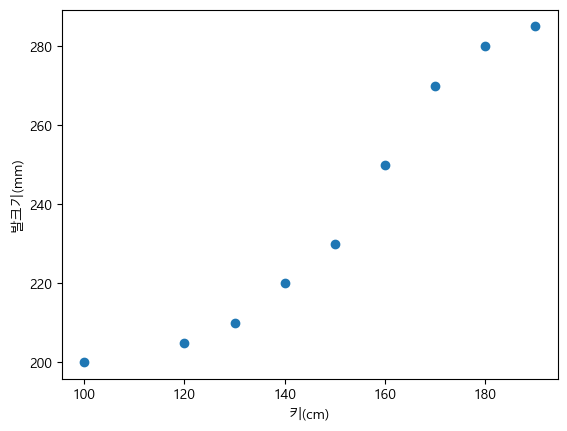

In [5]:
키=[100,120,130,140,150,160,170,180,190]
발크기=[200,205,210,220,230,250,270,280,285]
plt.scatter(키, 발크기)
plt.xlabel('키(cm)')
plt.ylabel('발크기(mm)')
plt.show()

0.966126323516351


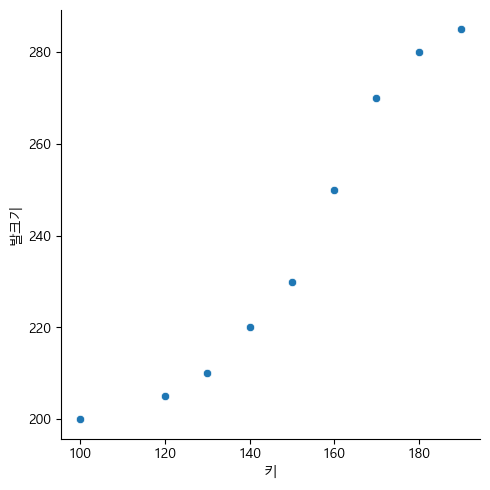

In [8]:
df=pd.DataFrame({'키':키,'발크기':발크기})
sns.relplot(x='키', y='발크기',data=df)
print(df.키.corr(df.발크기))
plt.show()

-0.9888665950759702


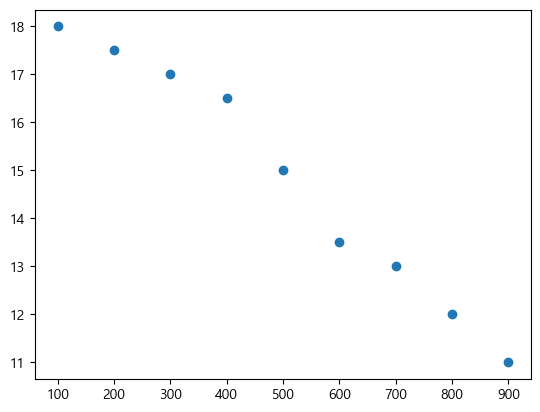

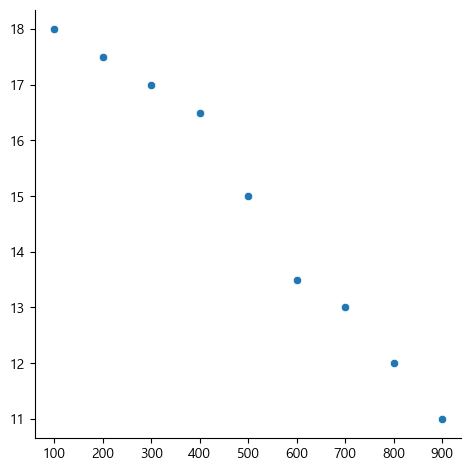

In [14]:
h=[100,200,300,400,500,600,700,800,900]
t=[18.0,17.5,17,16.5,15,13.5,13,12,11]
df=pd.DataFrame({'h':h, 't':t})
print(df.h.corr(df.t))
plt.scatter(h,t)
sns.relplot(x=h, y=t, data=df)

-0.06698143981095388


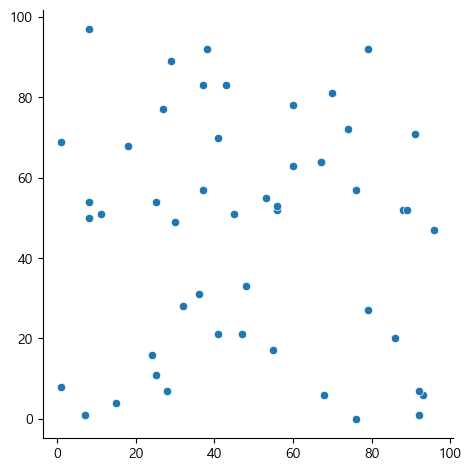

In [16]:
x=np.random.randint(0,100,50)
y=np.random.randint(0,100,50)
df=pd.DataFrame({'x':x, 'y':y})
print(df.x.corr(df.y))
sns.relplot(x=x, y=y, data=df)

0.6757341092113641


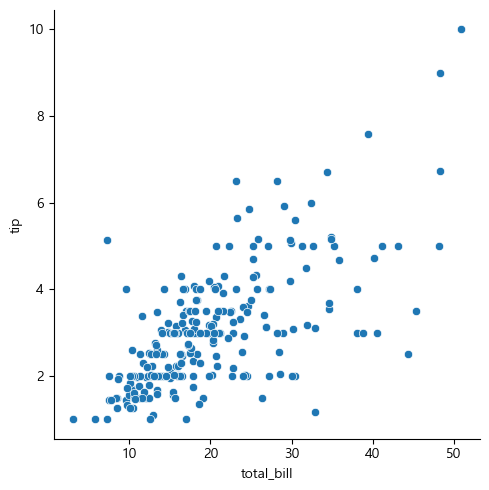

In [19]:
tips=sns.load_dataset('tips')
print(tips.total_bill.corr(tips.tip))
sns.relplot(x='total_bill', y='tip', data=tips)

# 상관관계분석과 상관계수
- 상관관계분석: 두 변수사이의 상관정도를 분석하는 것
- 상관계수 : 상관관계 강도를 나타는 것

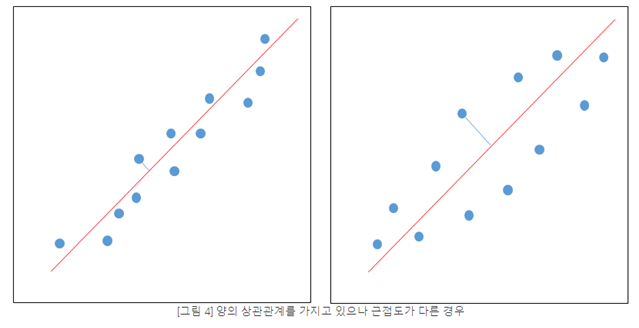

상관계수(기호 : r)
 - -1≤r≤1 의 값을 가짐

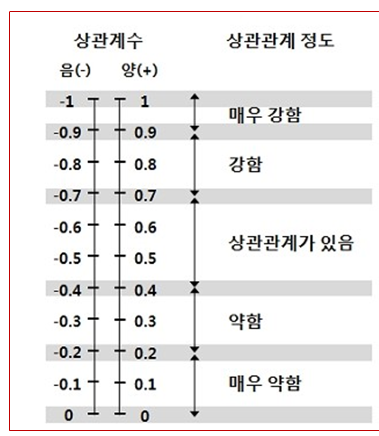

- 상관관계 분석식(모집단 전체의 상관계수 공식)

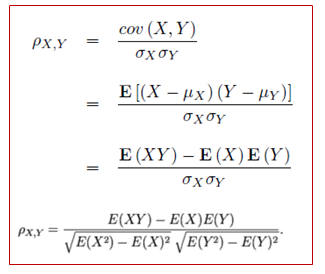


- 상관관계 분석식(표본: 일부 샘플들의 상관계수 공식)

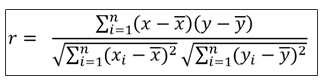

In [22]:
import math

def correlation(x,y):
    n=len(x)
    x_sum=0.0
    y_sum=0.0
    x_sum_pow=0.0
    y_sum_pow=0.0
    mul_xy_sum=0.0

    for i in range(n):
        mul_xy_sum = mul_xy_sum + float(x[i]) * float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow=x_sum_pow + pow(float(x[i]),2)
        y_sum_pow=y_sum_pow + pow(float(y[i]),2)

        try:
          r=((n*mul_xy_sum)-(x_sum*y_sum)) / math.sqrt(((n*x_sum_pow)-pow(x_sum,2)) * ((n*y_sum_pow)-pow(y_sum,2)))
        except:
          r=0.0 
    return r

In [24]:
print('키와 발크기 상관관계 분석:', correlation(키, 발크기))
print('산의 높이와 기온사이 상관관계 분석:', correlation(h, t))
print('random 발생 값 상관관계 분석:', correlation(x, y))

키와 발크기 상관관계 분석: 0.9661263235163509
산의 높이와 기온사이 상관관계 분석: -0.9888665950759703
random 발생 값 상관관계 분석: -0.06698143981095389


In [33]:
height = [100, 120, 130, 140, 150, 160, 170, 180, 190]
foot_size = [200, 205, 210, 220, 230, 250, 270, 280, 285]
weight=[25, 30, 38, 35, 40, 45, 55, 68, 70]
list=[height,foot_size, weight]
column_names=['height','foot_size','weight']
df=pd.DataFrame(list).T
df.columns=column_names
print(df['height'].corr(df['foot_size']))
print(df['height'].corr(df['weight']))
print(df['weight'].corr(df['foot_size']))
corr=df.corr()
print(corr)

0.966126323516351
0.9522708360712443
0.9698070048209746
             height  foot_size    weight
height     1.000000   0.966126  0.952271
foot_size  0.966126   1.000000  0.969807
weight     0.952271   0.969807  1.000000


# 상관관계 시각화 
- scatter : 두 변수 사이의 상관관계 시각화
- relplot : 두 변수 사이의 상관관계 시각화
- heatmap : 데이터프레임 필드사이의 상관관계 시각화

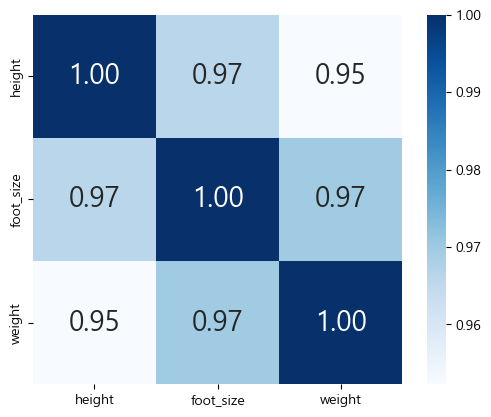

In [34]:
corr_heatmap=sns.heatmap(corr, # value
                         cbar=True, # 사이브바 표시, defalut True
                         annot=True, # 값 표시, defalut False
                         annot_kws={'size':20}, #annot의 글자크기
                         fmt='.2f',  # 숫자형식
                         square=True, # 정사각형 여부
                         cmap='Blues') # 색상

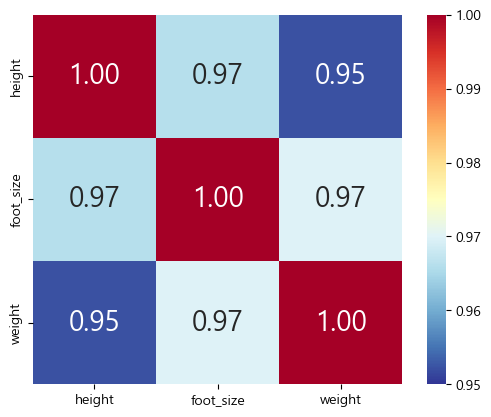

In [40]:
corr_heatmap=sns.heatmap(corr, # value
                         cbar=True, # 사이브바 표시, defalut True
                         annot=True, # 값 표시, defalut False
                         annot_kws={'size':20}, #annot의 글자크기
                         fmt='.2f',  # 숫자형식
                         square=True, # 정사각형 여부
                         cmap='RdYlBu_r', #색상
                         vmin=0.95, #최소값
                         vmax=1 #최대값
                         ) 

In [45]:
tips=sns.load_dataset('tips')
tips_corr=tips.corr()
tips_corr

C:\Users\admin\AppData\Local\Temp\ipykernel_2244\2052052474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips_corr=tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


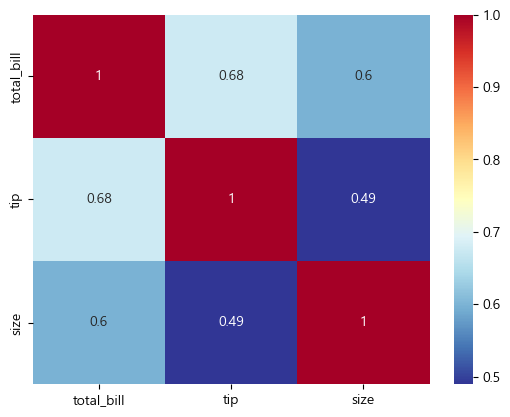

In [46]:
tips_corr_heatmap=sns.heatmap(tips_corr,
                              cbar=True,
                              annot=True,
                              cmap='RdYlBu_r')

[[False False False]
 [False False False]
 [False False False]]
[[ True  True  True]
 [False  True  True]
 [False False  True]]


C:\Users\admin\AppData\Local\Temp\ipykernel_2244\4117536965.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(tips_corr, dtype=np.bool)


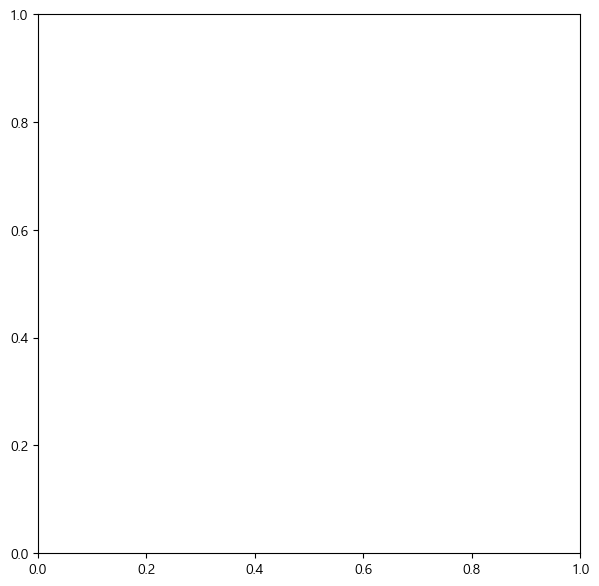

In [49]:
import numpy as np
fig,ax=plt.subplots(figsize=(7,7))
mask=np.zeros_like(tips_corr, dtype=np.bool)
print(mask)
mask[np.triu_indices_from(mask)]=True
print(mask)

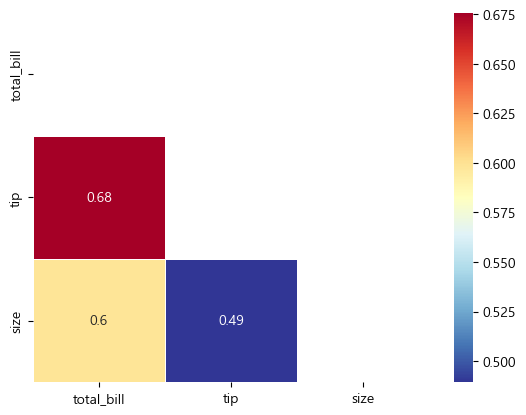

In [50]:
tips_corr_heatmap=sns.heatmap(tips_corr,
                              annot=True,
                              mask=mask,
                              linewidth=0.5,
                              cmap='RdYlBu_r')